In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

### 1. dataset 가져오기

In [22]:
# data 확인

print(mglearn.datasets.make_forge()[0].shape)
mglearn.datasets.make_forge()[0]

(26, 2)


array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [23]:
# target 확인

# data 확인

print(mglearn.datasets.make_forge()[1].shape)
mglearn.datasets.make_forge()[1]

(26,)


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [24]:
# 데이터셋을 만듭니다.
X, y = mglearn.datasets.make_forge()

X.shape: (26, 2)


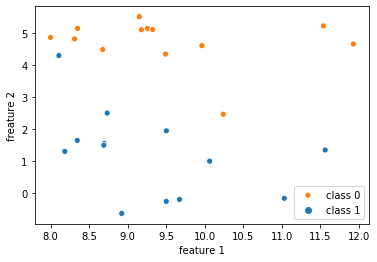

In [27]:
# 산점도를 그려보자

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.legend(['class 0','class 1'], loc=4)
plt.xlabel('feature 1')
plt.ylabel('freature 2')
print('X.shape:', X.shape)

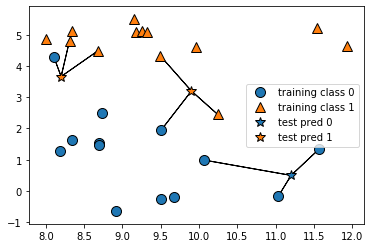

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
print("knn test score:{:.2f}".format(knn.score(X_test, y_test)))

knn test score:0.86


In [39]:
df=[]

for i, k in enumerate(range(1,20)):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    val_score = knn.score(X_test, y_test)
    df.append(val_score)
    print("neighbors:{}".format(k), "val_score:{:.2f}".format(val_score))

neighbors:1 val_score:0.86
neighbors:2 val_score:0.86
neighbors:3 val_score:0.86
neighbors:4 val_score:0.86
neighbors:5 val_score:0.86
neighbors:6 val_score:0.86
neighbors:7 val_score:0.86
neighbors:8 val_score:0.86
neighbors:9 val_score:0.86
neighbors:10 val_score:0.86
neighbors:11 val_score:0.86
neighbors:12 val_score:0.86
neighbors:13 val_score:0.86
neighbors:14 val_score:0.86
neighbors:15 val_score:0.86
neighbors:16 val_score:0.86
neighbors:17 val_score:0.86
neighbors:18 val_score:0.43
neighbors:19 val_score:0.43


Text(0, 0.5, 'val_score')

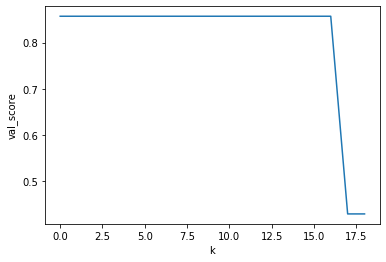

In [42]:
plt.plot(df)
plt.xlabel("k")
plt.ylabel("val_score")

### 다른 데이터 셋으로 해보자

In [43]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer = load_breast_cancer()

In [48]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [50]:
cancer.data.shape

(569, 30)

In [51]:
cancer.target.shape

(569,)

In [53]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=9)

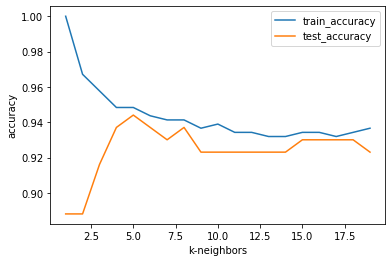

In [57]:
train_accuracy = []
test_accuracy = []
k = range(1,20)

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(k, train_accuracy, label='train_accuracy')
plt.plot(k, test_accuracy, label='test_accuracy')
plt.ylabel('accuracy')
plt.xlabel('k-neighbors')
plt.legend()

    